# Feynn Labs -Machine Learning Internship
# McDonald's Case Study Replication

Importing Libraries

In [1]:
import pandas as pd
import numpy as np

Collecting Data

In [2]:
df=pd.read_csv('mcdonalds.csv')

Exploring data

In [3]:
df.columns

Index(['yummy', 'convenient', 'spicy', 'fattening', 'greasy', 'fast', 'cheap',
       'tasty', 'expensive', 'healthy', 'disgusting', 'Like', 'Age',
       'VisitFrequency', 'Gender'],
      dtype='object')

In [4]:
df.head()

,yummy,convenient,spicy,fattening,greasy,fast,cheap,tasty,expensive,healthy,disgusting,Like,Age,VisitFrequency,Gender
0,No,Yes,No,Yes,No,Yes,Yes,No,Yes,No,No,-3,61,Every three months,Female
1,Yes,Yes,No,Yes,Yes,Yes,Yes,Yes,Yes,No,No,+2,51,Every three months,Female
2,No,Yes,Yes,Yes,Yes,Yes,No,Yes,Yes,Yes,No,+1,62,Every three months,Female
3,Yes,Yes,No,Yes,Yes,Yes,Yes,Yes,No,No,Yes,+4,69,Once a week,Female
4,No,Yes,No,Yes,Yes,Yes,Yes,No,No,Yes,No,+2,49,Once a month,Male


In [5]:
df.shape

(1453, 15)

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1453 entries, 0 to 1452
Data columns (total 15 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   yummy           1453 non-null   object
 1   convenient      1453 non-null   object
 2   spicy           1453 non-null   object
 3   fattening       1453 non-null   object
 4   greasy          1453 non-null   object
 5   fast            1453 non-null   object
 6   cheap           1453 non-null   object
 7   tasty           1453 non-null   object
 8   expensive       1453 non-null   object
 9   healthy         1453 non-null   object
 10  disgusting      1453 non-null   object
 11  Like            1453 non-null   object
 12  Age             1453 non-null   int64 
 13  VisitFrequency  1453 non-null   object
 14  Gender          1453 non-null   object
dtypes: int64(1), object(14)
memory usage: 170.4+ KB


In [7]:
# Converting categorical columns to numerical
df['yummy'] = df['yummy'].replace({'Yes':1 , 'No':0})
df['convenient'] = df['convenient'].replace({'Yes':1 , 'No':0})
df['spicy'] = df['spicy'].replace({'Yes':1 , 'No':0})
df['fattening'] = df['fattening'].replace({'Yes':1 , 'No':0})
df['greasy'] = df['greasy'].replace({'Yes':1 , 'No':0})
df['fast'] = df['fast'].replace({'Yes':1 , 'No':0})
df['cheap'] = df['cheap'].replace({'Yes':1 , 'No':0})
df['tasty'] = df['tasty'].replace({'Yes':1 , 'No':0})
df['expensive'] = df['expensive'].replace({'Yes':1 , 'No':0})
df['healthy'] = df['healthy'].replace({'Yes':1 , 'No':0})
df['disgusting'] = df['disgusting'].replace({'Yes':1 , 'No':0})
df.head()

,yummy,convenient,spicy,fattening,greasy,fast,cheap,tasty,expensive,healthy,disgusting,Like,Age,VisitFrequency,Gender
0,0,1,0,1,0,1,1,0,1,0,0,-3,61,Every three months,Female
1,1,1,0,1,1,1,1,1,1,0,0,+2,51,Every three months,Female
2,0,1,1,1,1,1,0,1,1,1,0,+1,62,Every three months,Female
3,1,1,0,1,1,1,1,1,0,0,1,+4,69,Once a week,Female
4,0,1,0,1,1,1,1,0,0,1,0,+2,49,Once a month,Male


In [8]:
# Extracting the eleven columns from df
df1 = df.iloc[:,0:11]
df1.head()

,yummy,convenient,spicy,fattening,greasy,fast,cheap,tasty,expensive,healthy,disgusting
0,0,1,0,1,0,1,1,0,1,0,0
1,1,1,0,1,1,1,1,1,1,0,0
2,0,1,1,1,1,1,0,1,1,1,0
3,1,1,0,1,1,1,1,1,0,0,1
4,0,1,0,1,1,1,1,0,0,1,0


In [9]:
yum =print(((df1['yummy'].value_counts(normalize=True)*100)[1]))
con =print(((df1['convenient'].value_counts(normalize=True)*100)[1]))
spi =print(((df1['spicy'].value_counts(normalize=True)*100)[1]))

55.26496902959395
90.77770130763938
9.359944941500343


In [10]:
# Principal Component Analysis
from sklearn.decomposition import PCA
pca = PCA(n_components=11)
principal_components = pca.fit_transform(df1)
pca_df = pd.DataFrame(data=principal_components,columns=["PCA1","PCA2","PCA3","PCA4","PCA5","PCA6","PCA7","PCA8","PCA9","PCA10","PCA11"])
pca_df.head()

,PCA1,PCA2,PCA3,PCA4,PCA5,PCA6,PCA7,PCA8,PCA9,PCA10,PCA11
0,0.425367,-0.219079,0.663255,-0.401300,0.201705,-0.389767,-0.211982,0.163235,0.181007,0.515706,-0.567074
1,-0.218638,0.388190,-0.730827,-0.094724,0.044669,-0.086596,-0.095877,-0.034756,0.111476,0.493313,-0.500440
2,0.375415,0.730435,-0.122040,0.692262,0.839643,-0.687406,0.583112,0.364379,-0.322288,0.061759,0.242741
3,-0.172926,-0.352752,-0.843795,0.206998,-0.681415,-0.036133,-0.054284,-0.231477,-0.028003,-0.250678,-0.051034
4,0.187057,-0.807610,0.028537,0.548332,0.854074,-0.097305,-0.457043,0.171758,-0.074409,0.031897,0.082245


In [11]:
pca_df[['PCA1','PCA2','PCA3','PCA4','PCA5','PCA6','PCA7','PCA8','PCA9','PCA10','PCA11']].std()

PCA1     0.757050
PCA2     0.607456
PCA3     0.504619
PCA4     0.398799
PCA5     0.337405
PCA6     0.310275
PCA7     0.289697
PCA8     0.275122
PCA9     0.265251
PCA10    0.248842
PCA11    0.236903
dtype: float64

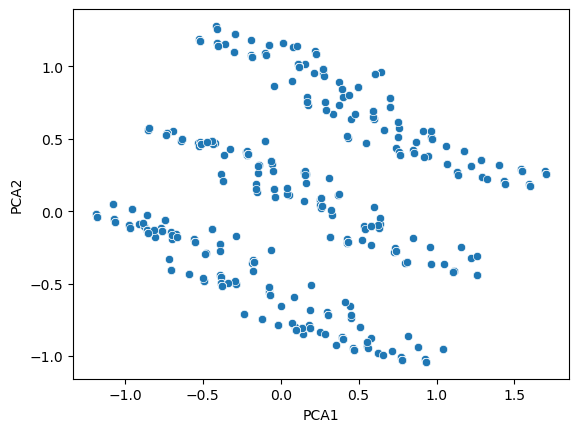

In [12]:
import seaborn as sns
import matplotlib.pyplot as plt
sns.scatterplot(data=pca_df, x='PCA1', y='PCA2',palette='gray')
plt.show()

In [13]:
# Using elbow method
from sklearn.cluster import KMeans
wcss = []
for i in range(1,11):
  # init is used for initializing the centroid
  kmeans = KMeans(n_clusters = i, init='k-means++', random_state = 10)
  kmeans.fit(df1)
  wcss.append(kmeans.inertia_)

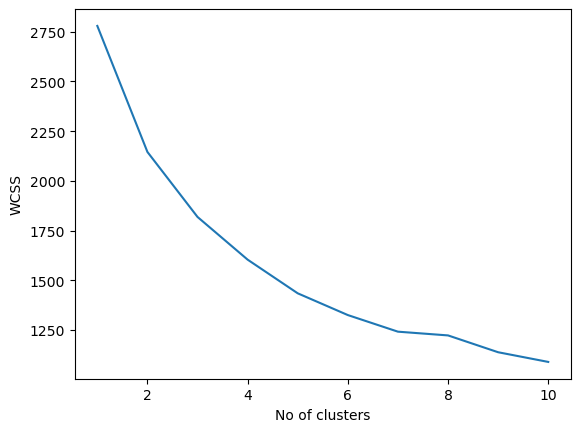

In [14]:
plt.plot(range(1,11),wcss)
plt.xlabel(range(1,11))
plt.xlabel('No of clusters')
plt.ylabel('WCSS')
plt.show()

In [15]:
k_means_model = KMeans(4)
k_means_model.fit_predict(df1)
df_kmeans= pd.concat([pca_df,pd.DataFrame({'cluster':k_means_model.labels_})],axis=1)

In [16]:
df_kmeans.head()

,PCA1,PCA2,PCA3,PCA4,PCA5,PCA6,PCA7,PCA8,PCA9,PCA10,PCA11,cluster
0,0.425367,-0.219079,0.663255,-0.401300,0.201705,-0.389767,-0.211982,0.163235,0.181007,0.515706,-0.567074,2
1,-0.218638,0.388190,-0.730827,-0.094724,0.044669,-0.086596,-0.095877,-0.034756,0.111476,0.493313,-0.500440,0
2,0.375415,0.730435,-0.122040,0.692262,0.839643,-0.687406,0.583112,0.364379,-0.322288,0.061759,0.242741,1
3,-0.172926,-0.352752,-0.843795,0.206998,-0.681415,-0.036133,-0.054284,-0.231477,-0.028003,-0.250678,-0.051034,0
4,0.187057,-0.807610,0.028537,0.548332,0.854074,-0.097305,-0.457043,0.171758,-0.074409,0.031897,0.082245,2


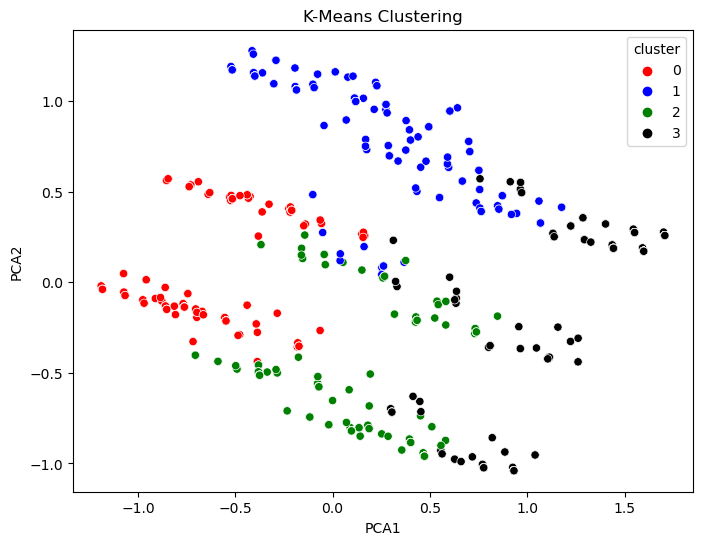

In [17]:
plt.figure(figsize=(8,6))
ax=sns.scatterplot(x="PCA1",y="PCA2",hue="cluster",data=df_kmeans,palette=['red','blue','green','black'])
plt.title('K-Means Clustering')
plt.show()

In [18]:
k_means_model = KMeans(4)
k_means_model.fit_predict(df1)
df_kmeans1= pd.concat([df1,pd.DataFrame({'cluster':k_means_model.labels_})],axis=1)
df_kmeans1.head()

,yummy,convenient,spicy,fattening,greasy,fast,cheap,tasty,expensive,healthy,disgusting,cluster
0,0,1,0,1,0,1,1,0,1,0,0,3
1,1,1,0,1,1,1,1,1,1,0,0,1
2,0,1,1,1,1,1,0,1,1,1,0,1
3,1,1,0,1,1,1,1,1,0,0,1,0
4,0,1,0,1,1,1,1,0,0,1,0,3


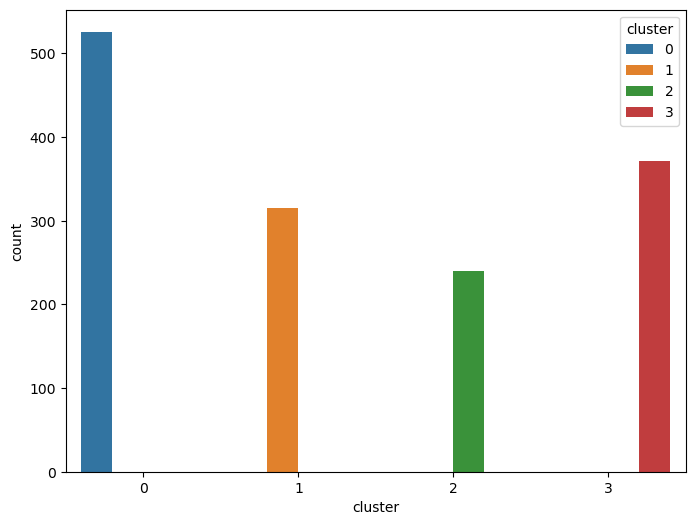

In [19]:
plt.figure(figsize=(8,6))
sns.countplot(x='cluster', data=df_kmeans1, hue='cluster')
plt.show()

In [20]:
df_kmeans1['cluster'].value_counts(normalize=True)*100

0    36.200964
3    25.602202
1    21.679284
2    16.517550
Name: cluster, dtype: float64

In [21]:
cluster1 = df_kmeans1[df_kmeans1['cluster']==0]
cluster1.head()

,yummy,convenient,spicy,fattening,greasy,fast,cheap,tasty,expensive,healthy,disgusting,cluster
3,1,1,0,1,1,1,1,1,0,0,1,0
5,1,1,0,1,0,1,1,1,0,0,0,0
7,1,1,0,1,1,1,1,1,0,0,0,0
15,1,1,0,1,0,1,1,1,0,0,0,0
16,1,1,0,1,1,1,1,1,0,0,0,0


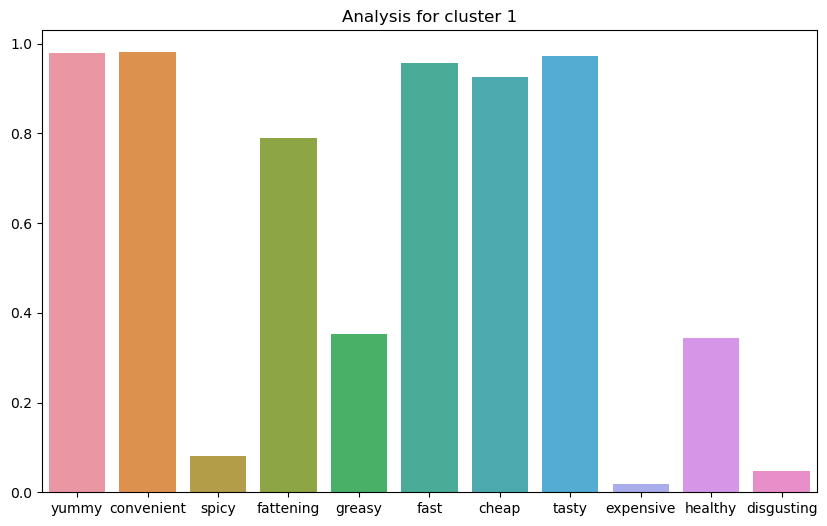

In [22]:
plt.figure(figsize=(10,6))
sns.barplot(data=cluster1[['yummy', 'convenient', 'spicy', 'fattening', 'greasy', 'fast', 'cheap', 'tasty', 'expensive', 'healthy', 'disgusting']],ci = None)
plt.title('Analysis for cluster 1')
plt.show()
     

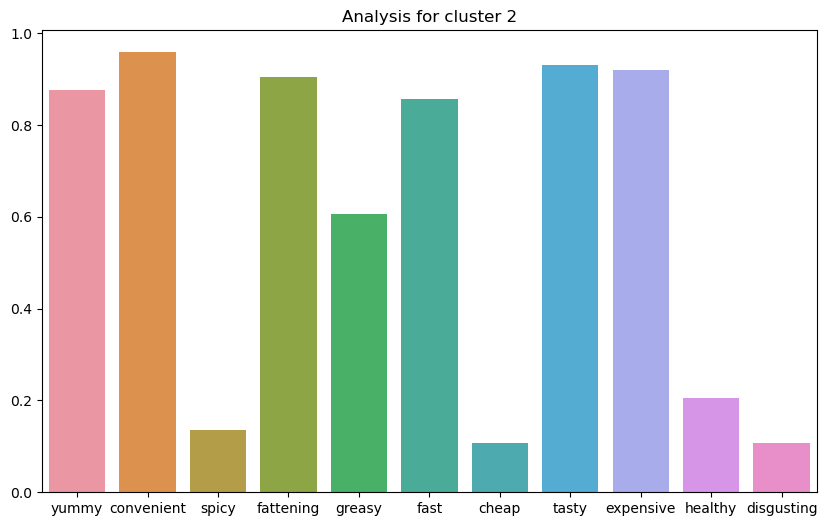

In [23]:
cluster2 = df_kmeans1[df_kmeans1['cluster']==1]
plt.figure(figsize=(10,6))
sns.barplot(data=cluster2[['yummy', 'convenient', 'spicy', 'fattening', 'greasy', 'fast', 'cheap', 'tasty', 'expensive', 'healthy', 'disgusting']],ci = None)
plt.title('Analysis for cluster 2')
plt.show()

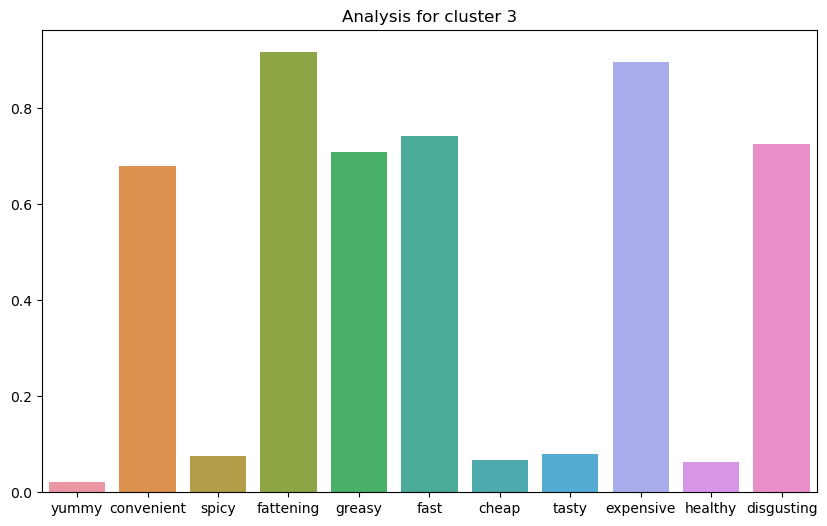

In [24]:
cluster3 = df_kmeans1[df_kmeans1['cluster']==2]
plt.figure(figsize=(10,6))
sns.barplot(data=cluster3[['yummy', 'convenient', 'spicy', 'fattening', 'greasy', 'fast', 'cheap', 'tasty', 'expensive', 'healthy', 'disgusting']],ci = None)
plt.title('Analysis for cluster 3')
plt.show()

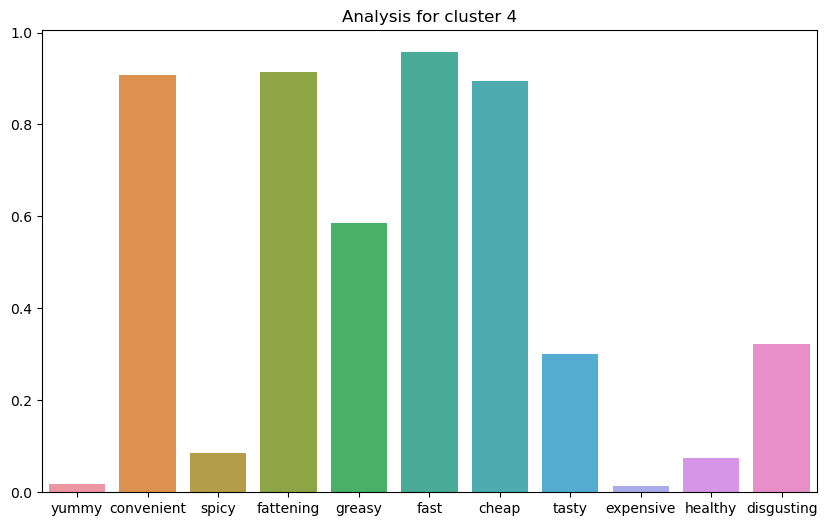

In [25]:
cluster4 = df_kmeans1[df_kmeans1['cluster']==3]
plt.figure(figsize=(10,6))
sns.barplot(data=cluster4[['yummy', 'convenient', 'spicy', 'fattening', 'greasy', 'fast', 'cheap', 'tasty', 'expensive', 'healthy', 'disgusting']],ci = None)
plt.title('Analysis for cluster 4')
plt.show()
     

In [26]:
df= pd.concat([df,pd.DataFrame({'cluster':k_means_model.labels_})],axis=1)
df.head()

,yummy,convenient,spicy,fattening,greasy,fast,cheap,tasty,expensive,healthy,disgusting,Like,Age,VisitFrequency,Gender,cluster
0,0,1,0,1,0,1,1,0,1,0,0,-3,61,Every three months,Female,3
1,1,1,0,1,1,1,1,1,1,0,0,+2,51,Every three months,Female,1
2,0,1,1,1,1,1,0,1,1,1,0,+1,62,Every three months,Female,1
3,1,1,0,1,1,1,1,1,0,0,1,+4,69,Once a week,Female,0
4,0,1,0,1,1,1,1,0,0,1,0,+2,49,Once a month,Male,3


In [27]:
df['Like'].value_counts()

+3              229
+2              187
0               169
+4              160
+1              152
I hate it!-5    152
I love it!+5    143
-3               73
-4               71
-2               59
-1               58
Name: Like, dtype: int64

In [28]:
df['Like'] = df['Like'].replace({'I hate it!-5':0 ,'-4':1, '-3':2, '-2':3, '-1':4, '0':5, '+1':6, '+2':7, '+3':8, '+4':9, 'I love it!+5':10})
df.tail()

,yummy,convenient,spicy,fattening,greasy,fast,cheap,tasty,expensive,healthy,disgusting,Like,Age,VisitFrequency,Gender,cluster
1448,0,1,0,1,1,0,0,0,1,0,1,0,47,Once a year,Male,2
1449,1,1,0,1,0,0,1,1,0,1,0,7,36,Once a week,Female,0
1450,1,1,0,1,0,1,0,1,1,0,0,8,52,Once a month,Female,1
1451,1,1,0,0,0,1,1,1,0,1,0,9,41,Every three months,Male,0
1452,0,1,0,1,1,0,0,0,1,0,1,2,30,Every three months,Male,2


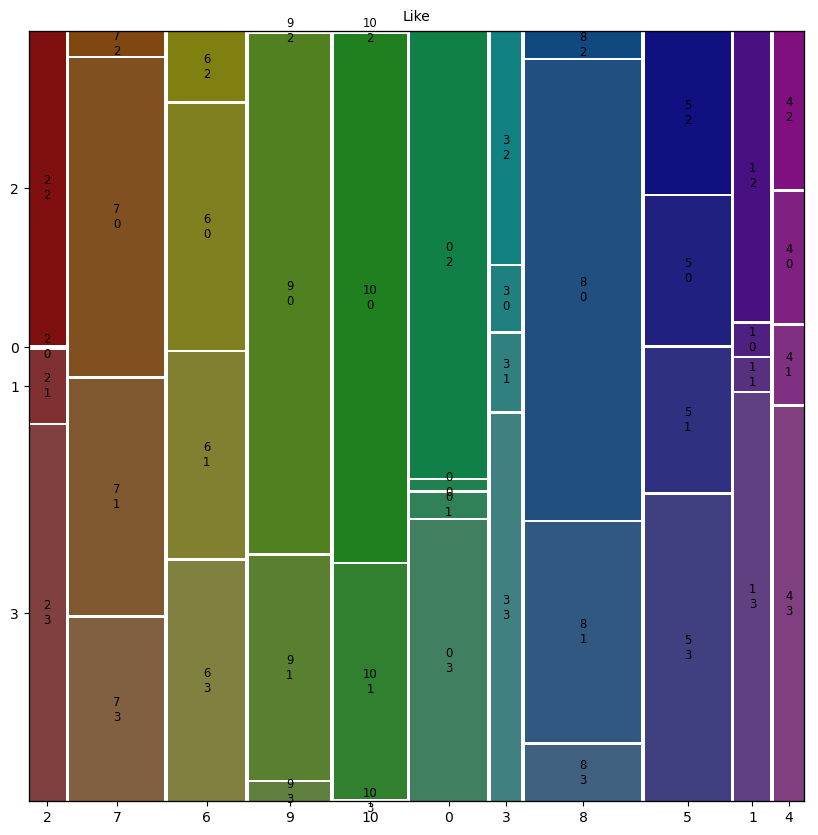

In [29]:
from statsmodels.graphics.mosaicplot import mosaic
plt.rcParams['figure.figsize']=(10,10)
mosaic(df,['Like','cluster'])
plt.xlabel('Like')
plt.show()    

In [30]:
df['Gender'].value_counts()

Female    788
Male      665
Name: Gender, dtype: int64

In [31]:
df['Gender'] = df['Gender'].replace({'Female':0, 'Male':1})
     

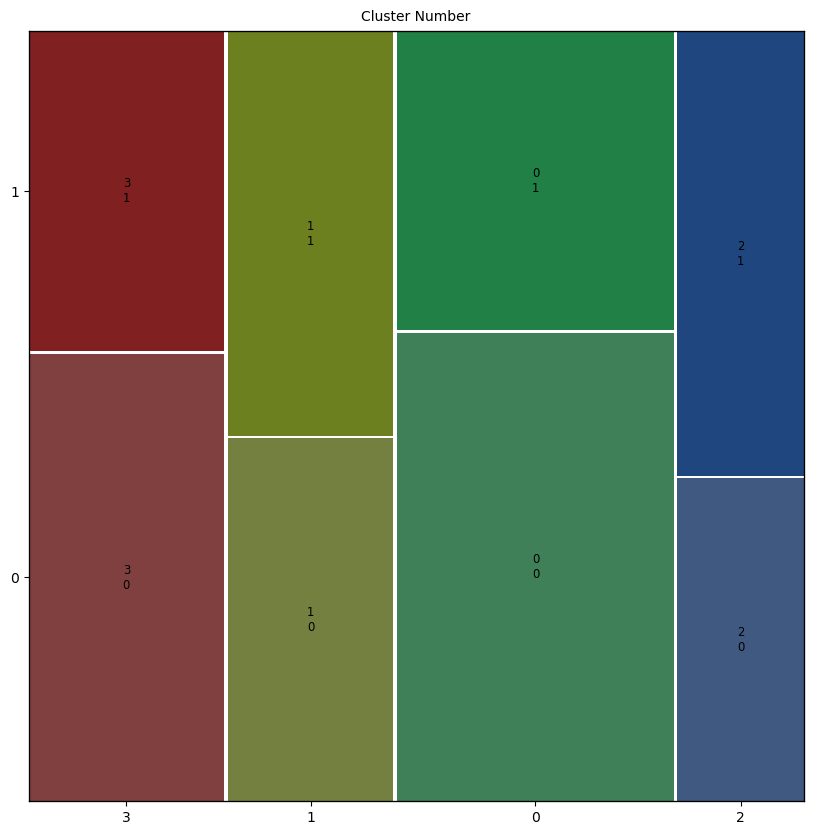

In [32]:
mosaic(df,['cluster','Gender'])
plt.xlabel('Cluster Number')
plt.show()
     

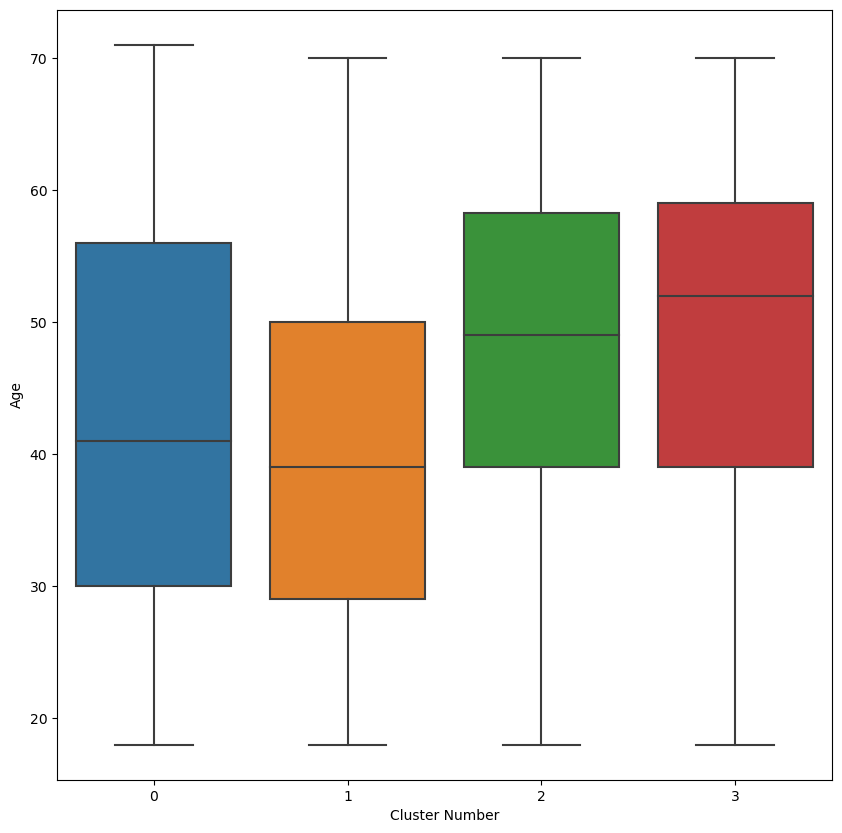

In [33]:
sns.boxplot(x=df['cluster'], y=df['Age'])
plt.xlabel('Cluster Number')
plt.show()

In [34]:
df['VisitFrequency'].value_counts()

Once a month             439
Every three months       342
Once a year              252
Once a week              235
Never                    131
More than once a week     54
Name: VisitFrequency, dtype: int64

In [35]:
df['VisitFrequency'] = df['VisitFrequency'].replace({'Never':0, 'Once a week':1, 'More than once a week':2, 'Once a month':3, 'Every three months':4, 'Once a year':5})
df.head()

,yummy,convenient,spicy,fattening,greasy,fast,cheap,tasty,expensive,healthy,disgusting,Like,Age,VisitFrequency,Gender,cluster
0,0,1,0,1,0,1,1,0,1,0,0,2,61,4,0,3
1,1,1,0,1,1,1,1,1,1,0,0,7,51,4,0,1
2,0,1,1,1,1,1,0,1,1,1,0,6,62,4,0,1
3,1,1,0,1,1,1,1,1,0,0,1,9,69,1,0,0
4,0,1,0,1,1,1,1,0,0,1,0,7,49,3,1,3


In [36]:
X = df.iloc[:,0:15]
Y = df.iloc[:,15]

In [37]:
from sklearn.model_selection import train_test_split
X_train,X_test,Y_train,Y_test = train_test_split(X,Y,test_size=0.3,random_state=10)
print(X_train.shape)
print(X_test.shape)

(1017, 15)
(436, 15)


In [38]:
from sklearn.tree import DecisionTreeClassifier
data = DecisionTreeClassifier(random_state=1234)
model = data.fit(X, Y)

In [39]:
from sklearn import tree
text_representation = tree.export_text(data)
print(text_representation)

|--- feature_0 <= 0.50
|   |--- feature_8 <= 0.50
|   |   |--- feature_6 <= 0.50
|   |   |   |--- feature_10 <= 0.50
|   |   |   |   |--- feature_1 <= 0.50
|   |   |   |   |   |--- class: 2
|   |   |   |   |--- feature_1 >  0.50
|   |   |   |   |   |--- feature_9 <= 0.50
|   |   |   |   |   |   |--- feature_12 <= 65.50
|   |   |   |   |   |   |   |--- class: 3
|   |   |   |   |   |   |--- feature_12 >  65.50
|   |   |   |   |   |   |   |--- feature_5 <= 0.50
|   |   |   |   |   |   |   |   |--- class: 2
|   |   |   |   |   |   |   |--- feature_5 >  0.50
|   |   |   |   |   |   |   |   |--- class: 3
|   |   |   |   |   |--- feature_9 >  0.50
|   |   |   |   |   |   |--- feature_11 <= 5.50
|   |   |   |   |   |   |   |--- feature_5 <= 0.50
|   |   |   |   |   |   |   |   |--- class: 1
|   |   |   |   |   |   |   |--- feature_5 >  0.50
|   |   |   |   |   |   |   |   |--- class: 3
|   |   |   |   |   |   |--- feature_11 >  5.50
|   |   |   |   |   |   |   |--- class: 0
|   |   |   |--- fe

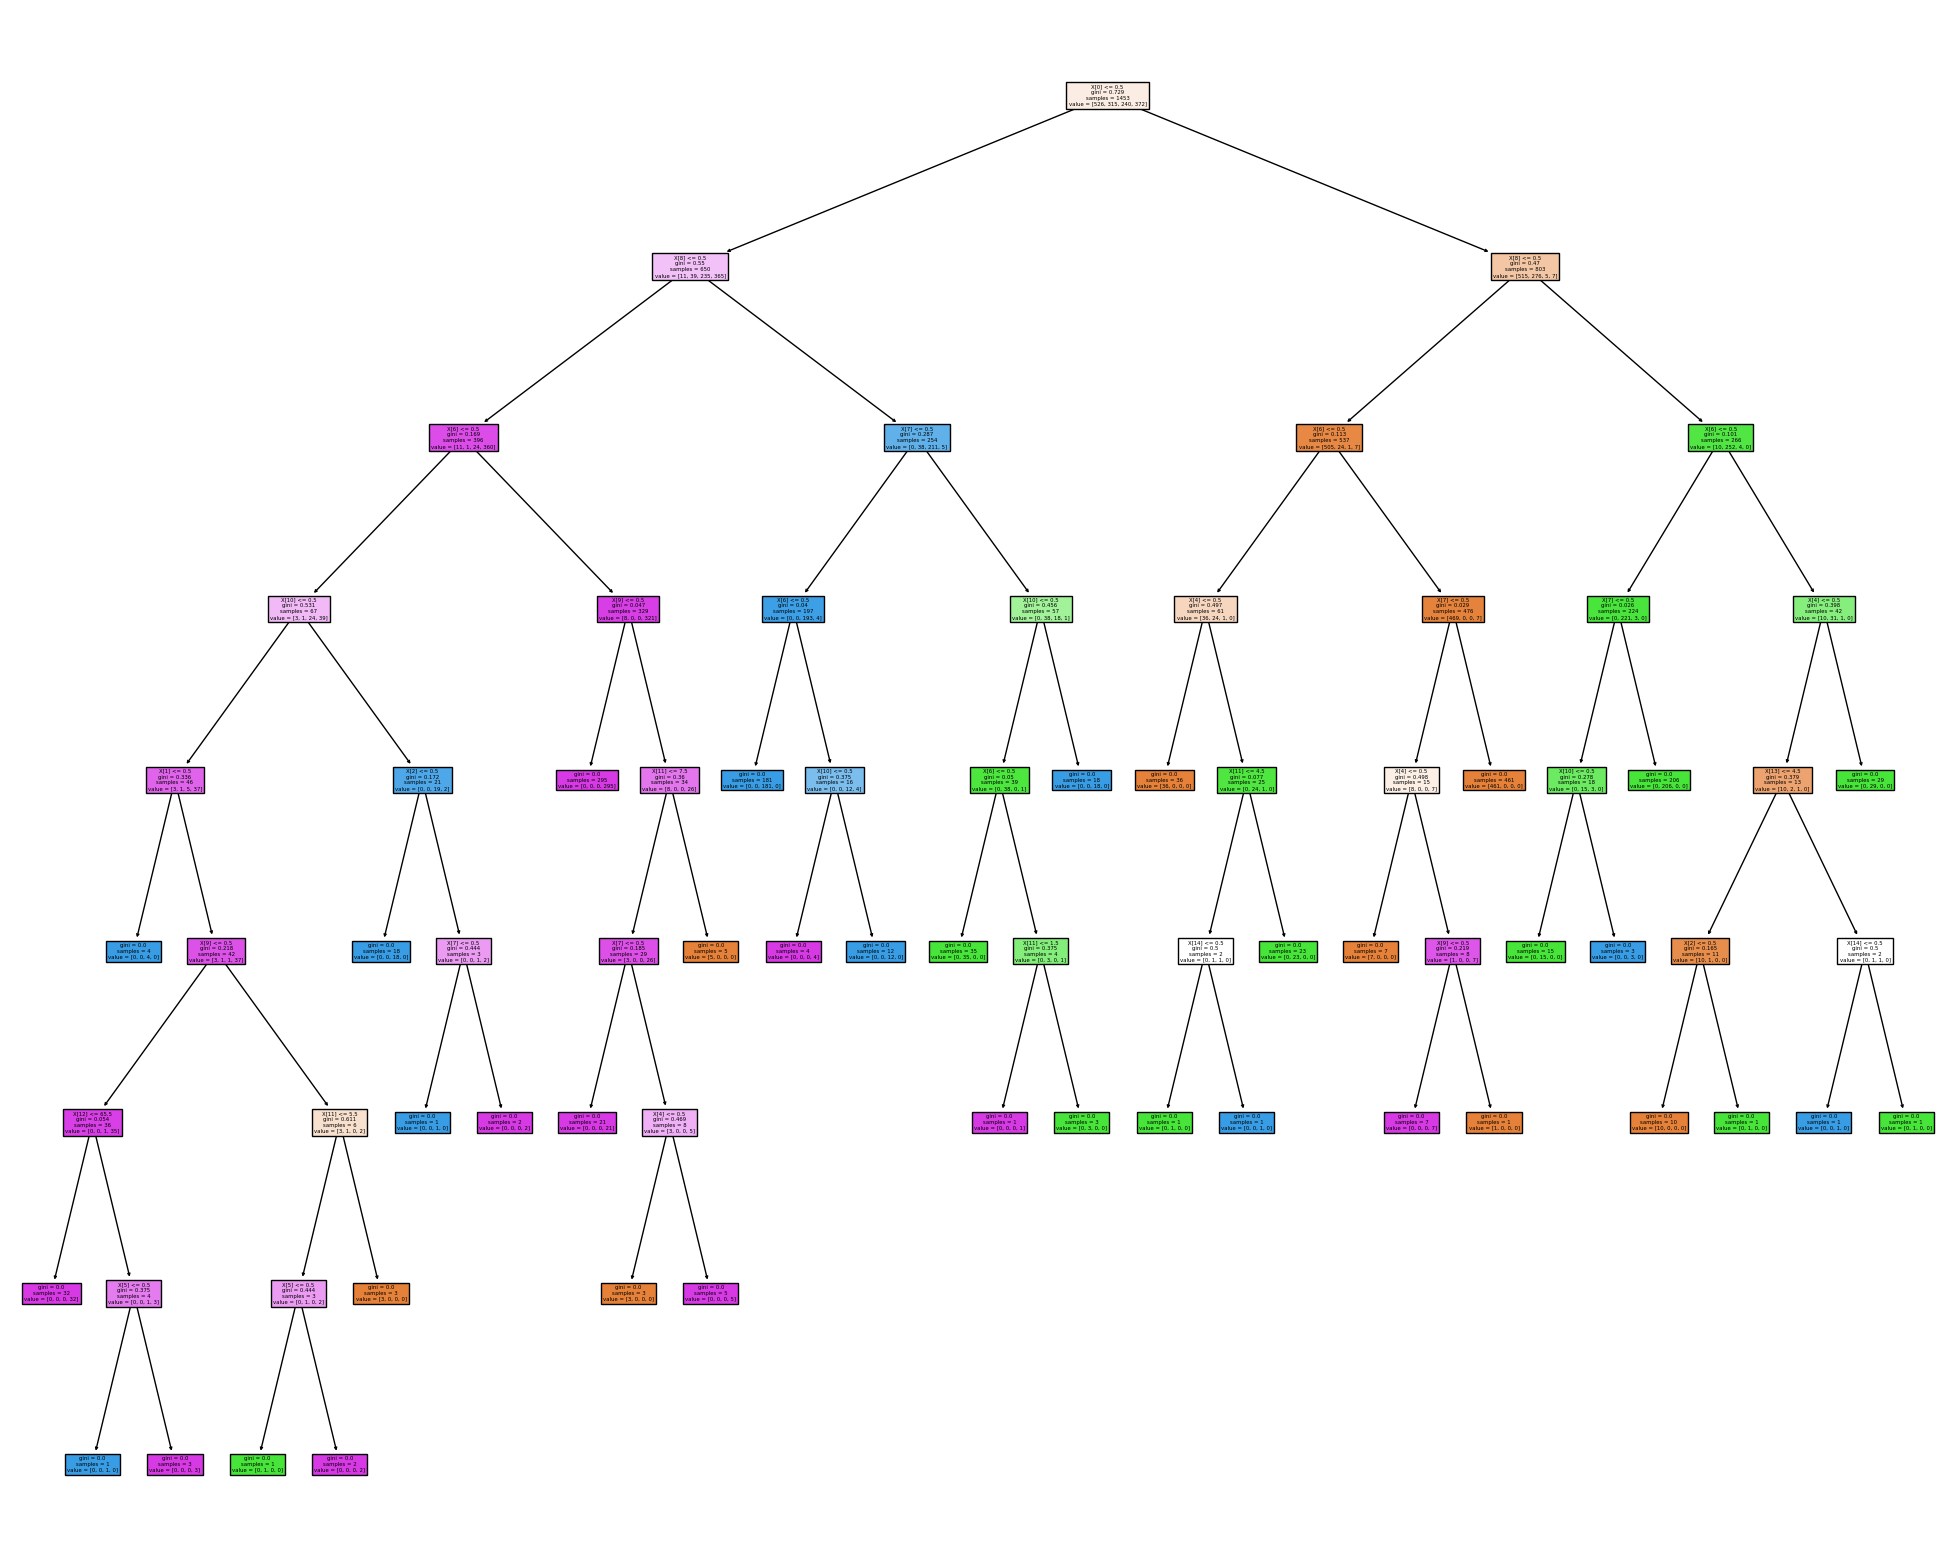

In [41]:
fig = plt.figure(figsize=(25,20))
_ = tree.plot_tree(data, filled=True)